In [3]:
import pandas as pd
import numpy as np
import pathlib as pl
import sklearn
import pathlib as pl

In [55]:
# dictionarypath = '../dataset/dictionary/Loughran-McDonald_MasterDictionary_1993-2021.csv'
# wds_dict = pd.read_csv(dictionarypath)
# positive_wds = [row['Word'].lower() for i, row in wds_dict.iterrows() if row['Positive']!=0]
# negative_wds = [row['Word'].lower() for i, row in wds_dict.iterrows() if row['Negative']!=0]

dictionarypath = '../dataset/dictionary/LM-SA-2020.csv'
wds_dict = pd.read_csv(dictionarypath)
positive_wds = [row['word'] for i, row in wds_dict.iterrows() if row['sentiment']=='Positive']
negative_wds = [row['word'] for i, row in wds_dict.iterrows() if row['sentiment']=='Negative']

In [56]:
# path = '../dataset/finRep/FinancialPhraseBank/all-data.csv'
# df = pd.read_csv(path, encoding = "ISO-8859-1", names = ['sentiment', 'sentence'])
# # print(df[:10])
# path = '../dataset/finRep/FiQA/fiqa_extended.csv'

path = '../dev/web_scrapper/sentfin_extended22.csv'
df = pd.read_csv(path, encoding = "ISO-8859-1")

# df['sentiment_score'] = np.where((df['sentiment_score'] < 0.35 ) & (df['sentiment_score'] > -0.35), 0, df['sentiment_score'])
# df['sentiment_score'] = np.where((df['sentiment_score'] >= 0.35 ), 1, df['sentiment_score'])
# df['sentiment_score'] = np.where((df['sentiment_score'] <= -0.35 ), -1, df['sentiment_score'])
# df['sentiment_score'] = df['sentiment_score'].astype(int)
df

,Title,Decisions,links,source,title,body
0,The empire strikes back: Why gold will matter ...,neutral,https://m.economictimes.com/markets/commoditie...,m.economictimes.com,The empire strikes back: Why gold will matter ...,MUMBAI: The year 2013 was a forgettable one fo...
1,Top brokers recommend 'subscribe' to Syngene I...,neutral,https://m.economictimes.com/markets/ipos/fpos/...,m.economictimes.com,Top brokers recommend 'subscribe' to Syngene I...,NEW DELHI: Brokerages are advising long-term i...
2,"Ujjivan Financial Rs 1,500 crore IPO to hit D-...",neutral,https://economictimes.indiatimes.com/markets/i...,economictimes.indiatimes.com,"Ujjivan Financial's Rs 1,500 crore IPO to hit ...",MUMBAI: Ujjivan Financial will be the first mi...
3,UTI AMC shortlists 3 names for Chairman and MD...,neutral,https://m.economictimes.com/uti-amc-shortlists...,m.economictimes.com,UTI AMC shortlists 3 names for Chairman and MD...,"NEW DELHI: UTI AMC, India's oldest asset manag..."
4,"UTI MF appoints Kaeley as group president, sal...",neutral,https://m.economictimes.com/uti-mf-appoints-ka...,m.economictimes.com,"UTI MF appoints Kaeley as group president, sal...",MUMBAI: UTI Mutual Fund has appointed Suraj Ka...
...,...,...,...,...,...,...
1434,"Interim Budget impact: Markets get a boost, ra...",positive,https://economictimes.indiatimes.com/interim-b...,economictimes.indiatimes.com,"Interim Budget impact: Markets get a boost, ra...",NEW DELHI: The good thing about the interim Bu...
1435,Investors should opt for higher exposure to PS...,positive,https://m.economictimes.com/markets/stocks/rec...,m.economictimes.com,Investors should opt for higher exposure to PS...,"In a chat with ET Now, Kunj Bansal, ED & CIO, ..."
1436,IT to find support around 9750-9800 on CNX IT:...,neutral,https://m.economictimes.com/markets/stocks/rec...,m.economictimes.com,IT to find support around 9750-9800 on CNX IT:...,"In a chat with ET Now, Ashwani Gujral, Fund Ma..."
1437,"IVRCL rallies 5% as CDR approves Rs 7,000-cror...",positive,https://m.economictimes.com/markets/stocks/new...,m.economictimes.com,"IVRCL rallies 5% as CDR approves Rs 7,000-cror...",NEW DELHI: IVRCL Ltd rose as much as 4.9 per c...


<AxesSubplot:>

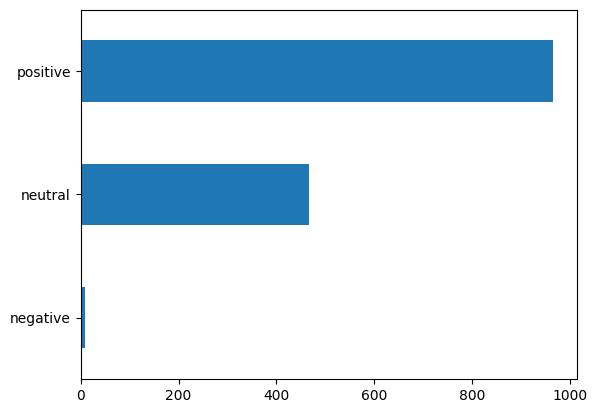

In [57]:
df.Decisions.value_counts().sort_values().plot(kind = 'barh')
# df.sentiment_score.value_counts().sort_values()

In [58]:
# to install keybert
# !pip install nltk
# !pip install keybert
# !pip install sentence-transformers
# !pip install git+https://github.com/LIAAD/yake
### To show the execution times
# !pip install ipython-autotime
# %load_ext autotime

In [128]:
import re

sample = df.sample(1).iloc[0]
title = sample['Title']
text = sample['body']
sentiment = sample['Decisions']
text = re.sub(r'[^A-Za-z0-9 .,;?!]+', ' ', text)
text = re.sub(' +', ' ', text)
print('Title: ' ,title)
print(text)
print('\nSentiment: ', sentiment)

Title:  Maize futures up on speculative activity
NEW DELHI Maize prices edged higher by Rs 21 to Rs 1,081 per quintal in futures trading today as participants created speculative positions. At the National Commodity and Derivatives Exchange counter, maize prices for most active near contracts July month advanced by Rs 21, or 1.98 per cent, to Rs 1,081 per quintal in an open interest of 37,380 lots. Maize for the delivery in current month, June also up by Rs 16, or 1.55 per cent, to Rs 1,048 per quintal having an open interest of 10,800 lots. Marketmen attributed rise in maize prices to speculative positions built up by particpnants but ample supplies from growing regions, capped the gains. 

Sentiment:  positive


In [129]:
def normalize_keyword_list(keyword_list):
    keys = []
    for keyword in keyword_list:
        keys.append(keyword[0])
    return keys

Rake

In [130]:
from rake_nltk import Rake
rake_nltk_var = Rake()

rake_nltk_var.extract_keywords_from_text(text)
rake_keywords = rake_nltk_var.get_ranked_phrases()
print(rake_keywords)

['active near contracts july month advanced', 'new delhi maize prices edged higher', 'participants created speculative positions', 'speculative positions built', 'marketmen attributed rise', 'futures trading today', 'derivatives exchange counter', '98 per cent', '55 per cent', '081 per quintal', '081 per quintal', '048 per quintal', 'maize prices', 'maize prices', 'current month', 'rs 21', 'rs 21', 'rs 16', 'open interest', 'open interest', 'national commodity', 'june also', 'growing regions', 'ample supplies', '800 lots', '380 lots', 'rs 1', 'rs 1', 'rs 1', 'maize', '1', '1', 'particpnants', 'gains', 'delivery', 'capped', '37', '10']


In [131]:
# Import them
from keybert import KeyBERT
from sentence_transformers import SentenceTransformer
from keyphrase_vectorizers import KeyphraseCountVectorizer

sent_trans = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
keyBERT_model = KeyBERT(model = sent_trans)

In [132]:
def extract_terms(document, vectorizer, 
                  top_N=7, model=keyBERT_model, diversity_threshold = 0.7):

  keywords = model.extract_keywords(document, stop_words='english', 
                                    vectorizer=vectorizer,
                                    use_mmr=True, 
                                    diversity = diversity_threshold,
                                    top_n = top_N
                                    )
  
  return sorted(keywords, key=lambda tup:(-tup[1], tup[0]))

In [133]:
# print(f'Text: {text}.\nLength: {len(text.split())}')
keybert_keywords = extract_terms(text, vectorizer=KeyphraseCountVectorizer())
keybert_keywords = normalize_keyword_list(keybert_keywords)

print(keybert_keywords)

['maize prices', 'speculative positions', 'national commodity', 'rise', 'current month', 'lots', 'regions']


In [134]:
import yake
kw_extractor = yake.KeywordExtractor()
yake_keywords = kw_extractor.extract_keywords(text)
yake_keywords = normalize_keyword_list(yake_keywords)

print(yake_keywords)


# print("SECOND FORM:")
# language = "en"
# max_ngram_size = 3
# deduplication_threshold = 0.9
# deduplication_algo = 'seqm'
# windowSize = 1
# numOfKeywords = 20

# custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=numOfKeywords, features=None)
# keywords = custom_kw_extractor.extract_keywords(text)

# for kw in keywords:
#     print(kw)

['futures trading today', 'DELHI Maize prices', 'prices edged higher', 'participants created speculative', 'Maize prices edged', 'Derivatives Exchange counter', 'DELHI Maize', 'Maize prices', 'created speculative positions', 'edged higher', 'futures trading', 'trading today', 'today as participants', 'participants created', 'National Commodity', 'Commodity and Derivatives', 'Derivatives Exchange', 'prices edged', 'contracts July month', 'July month advanced']


Keyphrase Extraction using TopicalPageRank

In [135]:
import pke

# initialize keyphrase extraction model, here TopicRank
extractor = pke.unsupervised.TopicalPageRank()

# load the content of the document, here document is expected to be a simple 
# test string and preprocessing is carried out using spacy
extractor.load_document(input=text, language='en')

# keyphrase candidate selection, in the case of TopicRank: sequences of nouns
# and adjectives (i.e. `(Noun|Adj)*`)
extractor.candidate_selection()

# candidate weighting, in the case of TopicRank: using a random walk algorithm
extractor.candidate_weighting()

# N-best selection, keyphrases contains the 10 highest scored candidates as
# (keyphrase, score) tuples
tpr_keyphrases = extractor.get_n_best(n=10)
tpr_keyphrases = normalize_keyword_list(tpr_keyphrases)
print(tpr_keyphrases)

['new delhi maize prices', 'maize prices', 'speculative positions', 'derivatives exchange counter', 'rs', 'maize', 'futures trading today', 'contracts july month', 'open interest', 'current month']


c:\Users\Rolando\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\feature_extraction\text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  % sorted(inconsistent)


In [136]:
Keywords = {}
Keywords["rake"] = rake_keywords
Keywords["keybert"] = keybert_keywords
Keywords["yake"] = yake_keywords
Keywords["tpr"] = tpr_keyphrases

print("Rake: %s" % Keywords["rake"]) 
print("Keybert: %s" % Keywords["keybert"]) 
print("Yake: %s" % Keywords["yake"])
print("Keyphrase: %s" % Keywords["tpr"])

Rake: ['active near contracts july month advanced', 'new delhi maize prices edged higher', 'participants created speculative positions', 'speculative positions built', 'marketmen attributed rise', 'futures trading today', 'derivatives exchange counter', '98 per cent', '55 per cent', '081 per quintal', '081 per quintal', '048 per quintal', 'maize prices', 'maize prices', 'current month', 'rs 21', 'rs 21', 'rs 16', 'open interest', 'open interest', 'national commodity', 'june also', 'growing regions', 'ample supplies', '800 lots', '380 lots', 'rs 1', 'rs 1', 'rs 1', 'maize', '1', '1', 'particpnants', 'gains', 'delivery', 'capped', '37', '10']
Keybert: ['maize prices', 'speculative positions', 'national commodity', 'rise', 'current month', 'lots', 'regions']
Yake: ['futures trading today', 'DELHI Maize prices', 'prices edged higher', 'participants created speculative', 'Maize prices edged', 'Derivatives Exchange counter', 'DELHI Maize', 'Maize prices', 'created speculative positions', 'ed

NLTK-VADER

In [137]:
print(keybert_keywords)

['maize prices', 'speculative positions', 'national commodity', 'rise', 'current month', 'lots', 'regions']


In [138]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

def vader(keywords):
    result = []
    for sentence in keywords:
        if (sid.polarity_scores(sentence)['compound']) >= 0.5:
            result.append(tuple((sentence, 1)))
        elif (sid.polarity_scores(sentence)['compound']) <= -0.5:
            result.append(tuple((sentence, -1)))
        else:
            result.append(tuple((sentence, 0)))
    return result

result = vader(keybert_keywords) 
print(result)            

[('maize prices', 0), ('speculative positions', 0), ('national commodity', 0), ('rise', 0), ('current month', 0), ('lots', 0), ('regions', 0)]


Using TextBlob

In [139]:
from textblob import TextBlob

def textblob(keywords):
    result = []
    for sentence in keybert_keywords:
        testimonial = TextBlob(sentence)
        if testimonial.sentiment.polarity >= 0.5:
            result.append(tuple((sentence, 1)))
        elif testimonial.sentiment.polarity <= -0.5:
            result.append(tuple((sentence, -1)))
        else:
            result.append(tuple((sentence, 0)))
    return result

result = textblob(keybert_keywords)
print(result)


[('maize prices', 0), ('speculative positions', 0), ('national commodity', 0), ('rise', 0), ('current month', 0), ('lots', 0), ('regions', 0)]


Using dictionary

In [140]:
def compare_words(keyword_list):
    result = []
    for sentence in keyword_list:
        words = sentence.split()
        score = 0
        for word in words:
            if word in positive_wds:
                score = score + 1
            elif word in negative_wds:
                score = score - 1
                
        if score > 0:
            score = 1
            result.append(tuple((sentence, score)))
        elif score < 0:
            score = -1
            result.append(tuple((sentence, score)))
        else:
            result.append(vader([sentence])[0])

    return result

In [141]:
keybert_sen = compare_words(keybert_keywords) #keybert

print(keybert_sen)

[('maize prices', 0), ('speculative positions', -1), ('national commodity', 0), ('rise', 1), ('current month', 0), ('lots', 0), ('regions', 0)]


In [142]:
# !pip install spacy
# !python -m spacy download en_core_web_sm

In [143]:
import spacy
nlp = spacy.load('en_core_web_sm')
FinalKeys = []  #FALTA AGREGAR EL 4TO KEYWORD EXTRACTOR!
for keybert in Keywords["keybert"]:
    word1 = nlp(keybert)
    for rake in Keywords["rake"]:
        word2 = nlp(rake)
        for yake in Keywords["yake"]:
            word3 = nlp(yake)
            if word3.similarity(word1) > 0.7 and (not(keybert in FinalKeys)):
                FinalKeys.append(keybert)
            if word3.similarity(word2) > 0.7 and not(rake in FinalKeys):
                FinalKeys.append(rake)
            if word2.similarity(word1) > 0.7 and not(keybert in FinalKeys):
                FinalKeys.append(keybert)



print(FinalKeys)

C:\Users\Rolando\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Rolando\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with

['maize prices', 'active near contracts july month advanced', 'participants created speculative positions', 'speculative positions built', 'marketmen attributed rise', 'futures trading today', 'national commodity', 'speculative positions', 'rise', 'current month', 'lots', 'regions']


In [144]:
keys_sent = compare_words(FinalKeys) #keybert

print(keys_sent)

[('maize prices', 0), ('active near contracts july month advanced', 1), ('participants created speculative positions', -1), ('speculative positions built', -1), ('marketmen attributed rise', 1), ('futures trading today', 0), ('national commodity', 0), ('speculative positions', -1), ('rise', 1), ('current month', 0), ('lots', 0), ('regions', 0)]


PREPROCESSING